In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
from scipy.stats import sem
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import glob as g
import re
plt.rcParams["figure.dpi"] = (150)


colors = {0: 'black', 1: 'blue', 2: 'red', 3: 'orange', 4: 'purple', 5: 'green'}
lab = {0: 'rep1', 1: 'rep2', 2: 'rep3', 3: 'rep4', 4: 'rep5', 5: 'rep6'}

In [2]:
path = '/lrlhps/users/l034064/TZP/monomer/AF_trimer_Cter_capped'

In [161]:
N_rep = 1
paths = []

for i in range(N_rep):
    aux = g.glob('{}/desmond_md_job_bza_60_merged/all_frames/'.format(path,i+1))
#    aux = g.glob('{}/desmond_md_job_trimer_bza_{}/all_frames/'.format(path,i+1))
#    aux = g.glob('{}/desmond_md_job_trimer_phenol_60_{}/all_frames/'.format(path,i+1)) #PHENOL

    print(aux)
paths.append(aux)

['/lrlhps/users/l034064/TZP/monomer/AF_trimer_Cter_capped/desmond_md_job_bza_60_merged/all_frames/']


In [162]:
N_frames = 200 # get 150 frames
dfs = []
only_dfs = []
for i in range(N_rep):
    for j in range(N_frames):
        j=j 
        aux = str(paths[0][0])+str(j)+"_aggregation.csv"
        #print(aux)
        df = pd.read_csv(aux)
        only_dfs.append(df)
        dfs.append([i,df])


In [163]:
combined_df = pd.concat(only_dfs, ignore_index=True)
# Filter rows with Type = 'hyd'
hyd_df = combined_df[combined_df['Type'] == 'hyd']
#hyd_df = combined_df
agg_score_avg = hyd_df['ASA (%)'].sum()
print(agg_score_avg/2000)

232.499615


In [164]:
dfs[1][1][dfs[1][1]['Type'] == 'hyd']

,Residue,Topo,Patch,Type,Size (Â²),Patch Score,Contribution (kcal/mol),AggScore,Zyggregator,Aggrescan,ASA (%)
91,A:PHE6,NaN,34,hyd,2052.8,1282.0,68.80,12.135,-0.933,0.121,48.81
92,C:TYR1,NaN,34,hyd,2052.8,1282.0,63.68,0.000,0.150,-0.382,66.77
93,A:TYR1,NaN,34,hyd,2052.8,1282.0,62.81,0.000,0.150,-0.382,72.60
94,C:PHE6,NaN,34,hyd,2052.8,1282.0,58.25,10.954,-0.933,0.121,46.49
95,A:ILE27,NaN,34,hyd,2052.8,1282.0,55.28,15.628,0.715,0.734,55.65
...,...,...,...,...,...,...,...,...,...,...,...
150,C:ALA35,NaN,34,hyd,2052.8,1282.0,2.62,1.201,-3.213,-0.305,49.74
151,A:ALA35,NaN,34,hyd,2052.8,1282.0,2.58,1.349,-3.213,-0.305,23.03
152,B:PHE6,NaN,35,hyd,173.1,128.0,59.03,0.000,-0.933,0.121,47.23
153,B:TYR1,NaN,35,hyd,173.1,128.0,52.25,0.000,0.150,-0.382,61.86


In [165]:
# Filter rows with Type = 'hyd'
hyd_df = combined_df[combined_df['Type'] == 'hyd']
#hyd_df = combined_df

In [166]:
# Group by Residue and calculate the average AggScore and ASA
agg_score_avg = hyd_df.groupby('Residue')['AggScore'].mean()
asa_avg = hyd_df.groupby('Residue')['ASA (%)'].mean()

In [167]:
agg_score_avg

Residue
A:AIB13    10.496220
A:AIB2      0.000000
A:ALA18     1.938190
A:ALA21     0.283000
A:ALA28     7.032591
             ...    
C:THR7      6.498269
C:TRP25     8.036359
C:TYR1      0.000000
C:TYR10     0.048485
C:VAL23     4.792716
Name: AggScore, Length: 84, dtype: float64

In [168]:
agg_score_sum = hyd_df.groupby('Residue')['AggScore'].mean().sum()
agg_score_sum

335.16760903224474

In [169]:
N_res = 39
# Loop through the index and AggScore values
res_agg_score = []
res_agg_score_A = []
res_agg_score_B = []
res_agg_score_C = []

res_asa_score = []

for i in range(N_res):
    resid = i+1
    for idx, row in combined_df.iterrows():
        residue = (combined_df['Residue'].iloc[idx])
        res_num = re.findall(r'\d+', residue)
        agg_value = combined_df['AggScore'].iloc[idx]
        asa_value = combined_df['ASA (%)'].iloc[idx]
        chain = combined_df['Residue'].iloc[idx][0]
        if (int(res_num[0]) == int(resid)):
            res_agg_score.append([resid,agg_value])
            res_asa_score.append([resid,asa_value])

        if chain == 'A':
            if (int(res_num[0]) == int(resid)):
                res_agg_score_A.append([resid,agg_value])
        elif chain == 'B':
            if (int(res_num[0]) == int(resid)):
                res_agg_score_B.append([resid,agg_value])
        elif chain == 'C':
            if (int(res_num[0]) == int(resid)):
                res_agg_score_C.append([resid,agg_value])
            

In [170]:
#get averages and errors of AggScore and ASA per residue

sol_agg = []  #here we need to change the system
sol_asa = []

res_agg_avg_err = []
for i in range(N_res):
    resid = i+1
    agg_array = []
    asa_array = []
    #AGGSCORE
    for agg in res_agg_score:
        if (int(agg[0]) == resid):
            agg_array.append(agg[1])
           #AGGSCORE
    for asa in res_asa_score:
        if (int(asa[0]) == resid):
            asa_array.append(asa[1])
            
    # checking aggscore is relevant
    agg_res = sum(agg_array)/(N_frames*N_rep)
    if agg_res > 0.2: # 0.2 is just a test
        #print(resid,agg_res, sem(agg_array),statistics.pstdev(agg_array))
        sol_agg.append([resid,agg_res,statistics.pstdev(agg_array)])
    else:
        sol_agg.append([resid,0,0])
            
 
    # checking ASA is relevant
    if (asa_array == []):
        asa_res = 0
        sol_asa.append([resid,asa_res,0.0])
    else:
        asa_res = sum(asa_array)/len(asa_array)
        print(resid,asa_res,statistics.pstdev(asa_array))
        sol_asa.append([resid,asa_res,statistics.pstdev(asa_array)])
    

1 61.019581056466286 8.858495639640413
2 0.0 0.0
3 51.47801875732709 7.085456560298563
4 95.30916223404256 19.217698090818534
5 51.120740131579 8.854317548791483
6 45.07843294460644 10.647028443308361
7 47.59558061821212 9.99171037034555
8 57.24268673355639 6.652565948235395
9 44.280116861435715 10.282698574287243
10 36.10575040783026 9.045470460740983
11 42.561148936170184 11.446994747568798
12 51.7002548853016 5.396264726841455
13 0.0 0.0
14 16.09843971631204 7.040066517626593
15 35.80523156089192 9.03687176856427
16 45.74415141430941 6.434483133738991
17 27.76866741321384 6.316731024303234
18 22.42488888888889 7.672074504974293
19 32.5142083333333 10.223522533079047
20 44.2506917164816 6.951517423059487
21 27.7237962962963 12.943458144417301
22 10.827179999999997 7.729848138715274
23 33.86781109445282 10.527874231694529
24 42.660488038277485 6.3230676834336315
25 16.96049086757992 5.4612065555291025
26 26.126638965835685 7.20906706746634
27 50.86201524132079 4.825577914061568
28 49.

In [171]:
#wat_agg = sol_agg
#wat_asa = sol_asa
bza_agg = sol_agg
bza_asa = sol_asa

<Figure size 600x450 with 0 Axes>

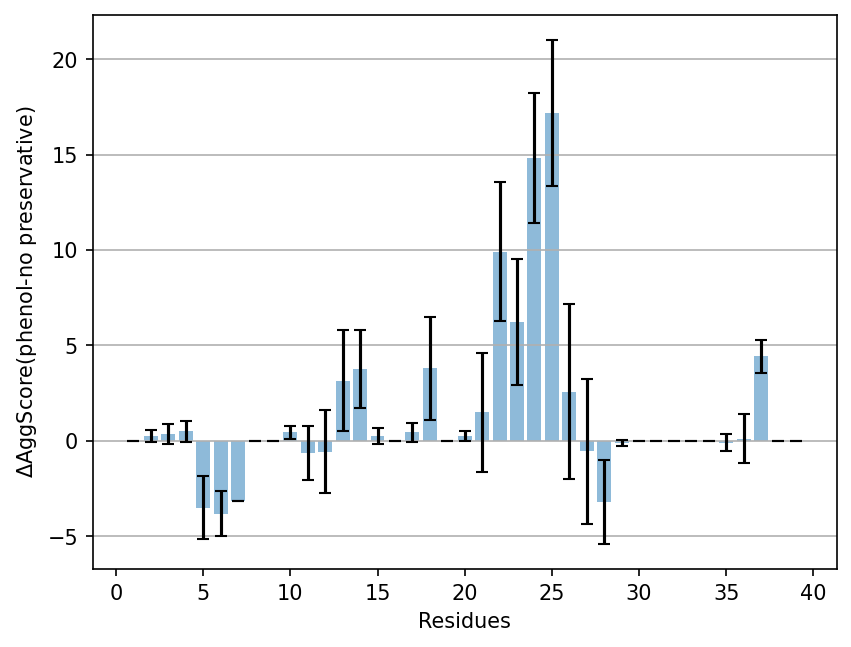

In [173]:
fig = plt.figure(figsize=(4,3))
res = []
avg_agg = []
err = []

for i in phe_agg:
    res_i = i[0]
    res.append(i[0])
    agg_preservative = i[1]
    err_preservative = i[2]
    for j in bza_agg:
        res_j = j[0]
        agg_water = j[1]
        err_water = j[2]
        if res_i == res_j:
            diff = agg_preservative - agg_water
            err_diff = (err_preservative*err_preservative - (err_water*err_water))**0.5
            #print(err_diff)
            avg_agg.append(diff)
            err.append(err_diff)
# creating the data values for the vertical y and horisontal x axis
x = np.array(res)
y = np.array(avg_agg)
error = np.array(err)
# Build the plot
fig, ax = plt.subplots()
ax.bar(x, y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=3)
ax.yaxis.grid(True)

#ax.legend(loc="best")
ax.set_xlabel("Residues")
ax.set_ylabel(r'$\Delta$AggScore(phenol-no preservative)')
#ax.set_ylim(-35,35.)

# to show our graph
plt.show()

<Figure size 600x450 with 0 Axes>

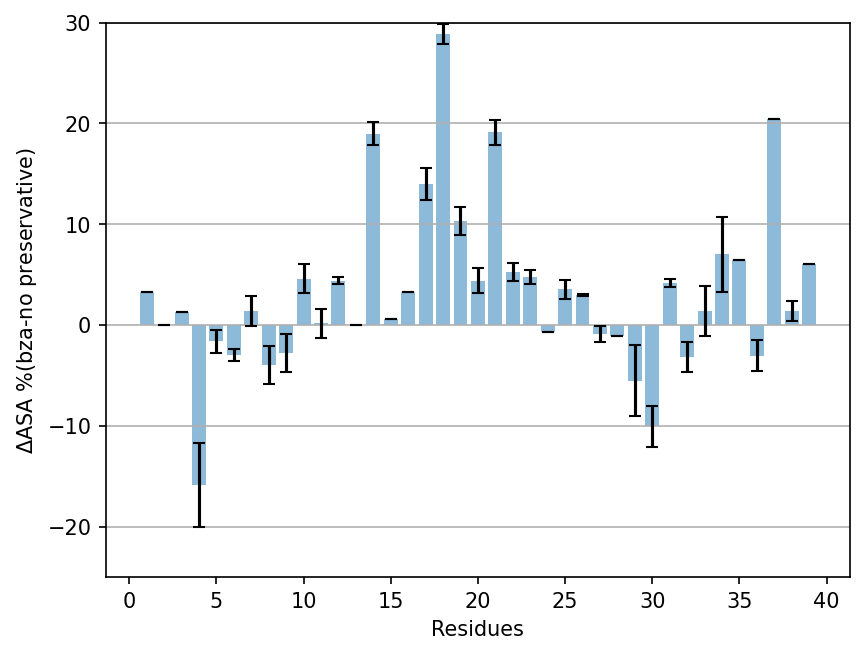

In [75]:
fig = plt.figure(figsize=(4,3))
res = []
avg_asa = []
err = []

for i in phe_asa:
    res_i = i[0]
    res.append(i[0])
    asa_preservative = i[1]
    err_preservative = i[2]
    for j in wat_asa:
        res_j = j[0]
        asa_water = j[1]
        err_water = j[2]
        if res_i == res_j:
            diff = asa_preservative - asa_water
            err_diff = (err_preservative*err_preservative - (err_water*err_water))**0.5
            #print(err_diff)
            avg_asa.append(diff)
            err.append(err_diff*0.2)
# creating the data values for the vertical y and horisontal x axis
x = np.array(res)
y = np.array(avg_asa)
error = np.array(err)
# Build the plot
fig, ax = plt.subplots()
ax.bar(x, y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=3)
ax.yaxis.grid(True)

#ax.legend(loc="best")
ax.set_xlabel("Residues")
ax.set_ylabel(r'$\Delta$ASA %(bza-no preservative)')
ax.set_ylim(-25,30.)

# to show our graph
plt.show()

<Figure size 600x450 with 0 Axes>

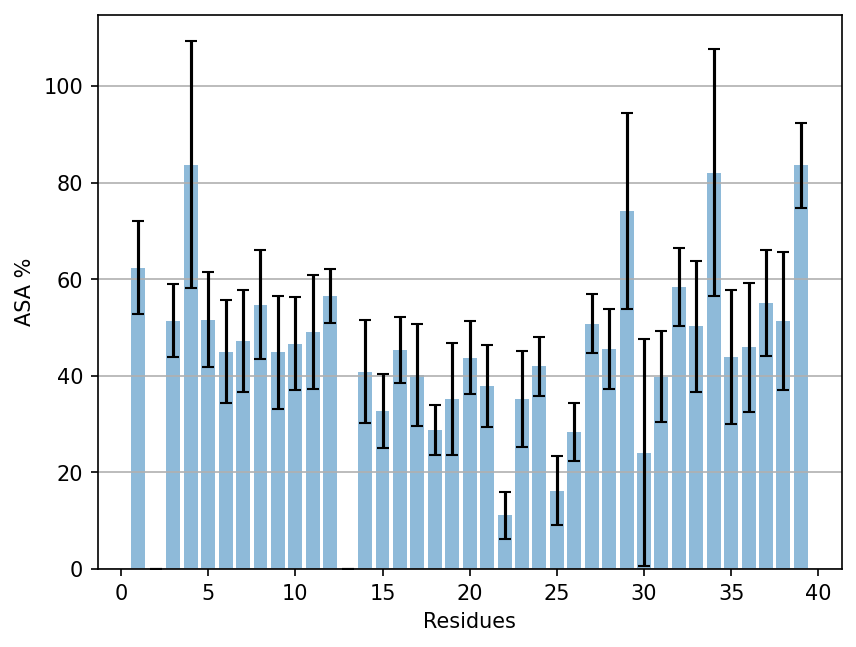

In [113]:
fig = plt.figure(figsize=(4,3))
res = []
avg = []
err = []


for i in phe_asa:
    res.append(i[0])
    avg.append(i[1])
    err.append(i[2])
# creating the data values for the vertical y and horisontal x axis
x = np.array(res)
y = np.array(avg)
error = np.array(err)
# Build the plot
fig, ax = plt.subplots()
ax.bar(x, y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=3)
ax.yaxis.grid(True)

#ax.legend(loc="best")
ax.set_xlabel("Residues")
ax.set_ylabel('ASA %')

# to show our graph
plt.show()

In [319]:
print('AggScore Nter')
print(sum(Nter_agg_score)/len(Nter_agg_score))
print('AggScore Cter')
print(sum(Cter_agg_score)/len(Cter_agg_score))

AggScore Nter
2.296775085504949
AggScore Cter
5.583964993504684


In [320]:
# Loop through the index and AggScore values
Nter_asa = []
Cter_asa = []

for residue, asa in asa_avg.items():
    res_num = re.findall(r'\d+', residue)
    if (float(res_num[0]) < 20): 
        Nter_asa.append(asa)
    if (float(res_num[0]) > 20): 
        Cter_asa.append(asa)
   

In [321]:
print('AggScore Nter')
print(sum(Nter_asa)/len(Nter_asa))
print('AggScore Cter')
print(sum(Cter_asa)/len(Cter_asa))

AggScore Nter
31.101652602541158
AggScore Cter
36.775862222033176


In [303]:
#Results AGG
agg_cter_phenol = [6.60,5.26, 6.06]
print('AggScore Cter phenol')
print(sum(agg_cter_phenol)/len(agg_cter_phenol))
print(sem(agg_cter_phenol))

agg_cter_water = [5.91,5.68, 4.26]
print('AggScore Cter water')
print(sum(agg_cter_water)/len(agg_cter_water))
print(sem(agg_cter_water))

agg_cter_bza = [4.69, 5.29, 5.58]
print('AggScore Cter bza')
print(sum(agg_cter_bza)/len(agg_cter_bza))
print(sem(agg_cter_bza))

AggScore Cter phenol
5.973333333333333
0.38924428205319994
AggScore Cter water
5.283333333333333
0.5159565011811666
AggScore Cter bza
5.1866666666666665
0.26206445348001267


In [148]:
agg_nter_phenol = [3.07,2.75, 4.77]
print('AggScore Nter phenol')
print(sum(agg_nter_phenol)/len(agg_nter_phenol))
print(sem(agg_nter_phenol))

agg_nter_water = [2.28,2.65, 3.75]
print('AggScore Nter water')
print(sum(agg_nter_water)/len(agg_nter_water))
print(sem(agg_nter_water))

agg_nter_bza = [3.59, 3.32, 2.29]
print('AggScore Nter bza')
print(sum(agg_nter_bza)/len(agg_nter_bza))
print(sem(agg_nter_bza))

AggScore Nter phenol
3.53
0.6268439465555468
AggScore Nter water
2.893333333333333
0.4414496322093584
AggScore Nter bza
3.0666666666666664
0.39607799456392145


<Figure size 600x450 with 0 Axes>

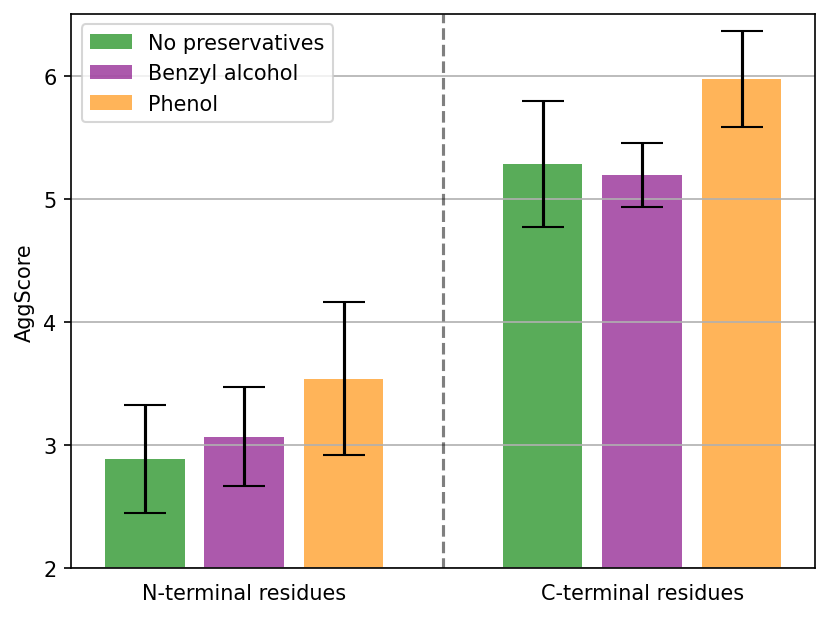

In [7]:
#AggScore plot Nter 
systems = ['No preservatives', 'Benzyl alcohol','Phenol',"","",""]
systems2 = ["","N-terminal residues","","","C-terminal residues",""]

fig = plt.figure(figsize=(4,3))

xx = [1,2,3,5,6,7]
yy = [2.89,3.07,3.54,5.28,5.19,5.97]
er = [0.44, 0.40,0.62,0.51,0.26,0.39]
#er = [0.16, 0.12,0.23,0.2,0.16,0.3]


bar_colors = ['green', 'purple','darkorange']

# creating the data values for the vertical y and horisontal x axis
x = np.array(xx)
y = np.array(yy)
error = np.array(er)
# Build the plot
fig, ax = plt.subplots()
ax.bar(x, y, yerr=error, align='center', alpha=0.65, ecolor='black', capsize=10, color=bar_colors,label=systems)
ax.plot([4,4],[0,6.5], color='k',linestyle='dashed', alpha= 0.5)
ax.yaxis.grid(True)

#ax.legend(loc="best")
#ax.set_xlabel("Systems")
yticks = [2,3,4,5,6]
ax.set_ylabel('AggScore')
ax.set_xticks(xx)
ax.legend(loc="best")
ax.set_xticklabels(systems2)
ax.set_yticks(yticks)
ax.set_ylim(2,6.5)
ax.xaxis.set_ticks_position('none') 
# to show our graph
plt.show()

In [13]:
sum_frames = []
cont_sum = []
cont_sum_neg = []
cont_sum_pos = []
num_patches = []
agg_lig = []
frames = 0
for df in (dfs):
    frames += 1 
    print ('FRAME = ', frames)
    for i in range(N_rep):
        # EACH Replica
        if df[0] == i:
            pat = []
            size = []
            contrib = []
            contrib_pos = []
            contrib_neg = []
            # EACH FRAME IN THE SPECIFIC REPLICA
            for idx, row in df[1].iterrows():
#               patch = df[1]['Patch'].iloc[idx]
                # DONT ALLOW REPETITIVE PATCHES
#                if patch not in pat:
                    # GET ONLY HYDROPHOBIC PATCHES

                    if (df[1]['Type'].iloc[idx] == 'hyd'):
                        print(df[1]['Residue'].iloc[idx], df[1]['AggScore'].iloc[idx],df[1]['ASA (%)'].iloc[idx])
                        s = (df[1]['Size (Â²)'].iloc[idx])
                        c = (df[1]['Contribution (kcal/mol)'].iloc[idx])
                        if s > 000.0:
                            size.append(s)
                            contrib.append(c)
                    if (df[1]['Type'].iloc[idx] == 'pos'):
                        c_pos = (df[1]['Contribution (kcal/mol)'].iloc[idx])
                        contrib_pos.append(c_pos)
                    if (df[1]['Type'].iloc[idx] == 'neg'):
                        c_neg = (df[1]['Contribution (kcal/mol)'].iloc[idx])
                        contrib_neg.append(c_neg)
                    
#                    pat.append(patch)
                 #   cont
            # SUM OF EACH ONE OF THE REPS
            agg_score_lig = sum(contrib)-0.5*(sum(contrib_neg) - sum(contrib_pos))
            num_patches.append(len(size))
            cont_sum_pos.append(sum(contrib_pos))
            cont_sum_neg.append(sum(contrib_neg))
            size_sum = sum(size)
            cont = sum(contrib)
            cont_sum .append(cont)
            sum_frames.append(size_sum)
            agg_lig.append(agg_score_lig)
            

FRAME =  1
B:TYR1 0.0 70.3
B:PHE6 8.101 48.25
A:ILE27 9.441 55.23
C:ILE27 14.433 51.85
A:ILE12 8.526 46.94
B:LEU26 15.334 36.44
B:ILE27 14.749 46.26
C:LEU26 14.179 28.98
C:VAL23 5.356 40.0
C:PRO36 4.769 56.25
B:TRP25 6.614 23.6
B:PRO36 3.838 54.77
A:LYS20 0.0 34.59
A:LEU26 10.922 28.15
A:PRO31 0.0 44.78
A:PRO37 4.57 45.87
A:LYS16 3.848 43.7
B:AIB2 0.0 0.0
B:PRO31 0.0 36.03
B:PHE22 2.891 10.53
A:ILE17 4.028 19.54
C:PRO31 0.0 24.65
A:VAL23 1.919 20.56
A:TRP25 6.285 13.69
C:PRO37 1.795 27.84
B:THR7 6.537 61.3
C:PRO38 0.0 32.48
C:ALA28 9.708 38.46
B:ALA28 8.598 53.68
C:GLN24 4.855 35.88
B:LYS20 0.0 38.62
B:VAL23 0.073 3.93
A:GLN24 2.951 34.69
C:ALA35 3.021 31.94
B:GLN24 0.446 45.36
A:PHE6 8.876 55.83
C:PHE6 8.559 51.45
A:TYR1 0.0 53.13
C:ILE12 7.409 51.05
B:ILE12 7.444 49.36
C:TYR10 0.0 35.22
B:TYR10 0.0 42.02
C:TYR1 0.0 54.66
A:TYR10 0.0 34.07
C:ILE17 0.0 27.73
C:LEU14 1.362 20.83
A:AIB2 0.0 0.0
B:ILE17 0.0 24.94
A:LEU14 5.409 18.92
B:AIB13 6.824 0.0
C:AIB2 0.0 0.0
C:AIB13 10.104 0.0
A:TH

In [89]:
sum(agg_lig)/len(agg_lig)

929.6965

In [90]:
avg_hyd = sum(cont_sum)/len(cont_sum)
avg_pos = sum(cont_sum_pos)/len(cont_sum_pos)
avg_neg = sum(cont_sum_neg)/len(cont_sum_neg)

hyd_cont = (avg_hyd/(avg_hyd+avg_pos+avg_neg))*100
print(hyd_cont)

30.672813384225577


In [95]:
print('Contribution')
print(sum(cont_sum)/len(cont_sum))
print('STD contrib')
print(statistics.pstdev(cont_sum))
print('ERR MEAN')
sem(cont_sum)

Contribution
1244.6450000000002
STD contrib
69.9061832148392
ERR MEAN


6.408289308602186

In [96]:
print('Contribution')
print(sum(cont_sum_pos)/len(cont_sum_pos))
print('STD contrib')
print(statistics.pstdev(cont_sum_pos))
print('ERR MEAN')
sem(cont_sum)

Contribution
1091.6348333333328
STD contrib
76.73412295043333
ERR MEAN


6.408289308602186

In [97]:
print('Contribution')
print(sum(cont_sum_neg)/len(cont_sum_neg))
print('STD contrib')
print(statistics.pstdev(cont_sum_neg))
print('ERR MEAN')
sem(cont_sum)

Contribution
1721.5318333333337
STD contrib
79.57642385346026
ERR MEAN


6.408289308602186

In [98]:
print('Patches')
print(sum(num_patches)/len(num_patches))
print('STD patches')
print(statistics.pstdev(num_patches))
print('ERR MEAN patches')
sem(num_patches)

Patches
60.516666666666666
STD patches
3.8922644080563464
ERR MEAN patches


0.35680329329016536

In [99]:
print('SASA')
print(sum(sum_frames)/len(sum_frames))
print('STD SASA')
print(statistics.pstdev(sum_frames))
print('ERR MEAN SASA')
sem(sum_frames)

SASA
71633.90083333333
STD SASA
28317.243518439118
ERR MEAN SASA


2595.8374573335

In [100]:
sum_frames = []
num_patches = []
cont_sum = []
for df in (dfs):
    for i in range(N_rep):
        # EACH Replica
        if df[0] == i:
            pat = []
            size = []
            contrib = []
            cont = []
            # EACH FRAME IN THE SPECIFIC REPLICA
            for idx, row in df[1].iterrows():
                patch = df[1]['Patch'].iloc[idx]
                # DONT ALLOW REPETITIVE PATCHES
                if patch not in pat:
                    # GET ONLY HYDROPHOBIC PATCHES
                    if (df[1]['Type'].iloc[idx] == 'hyd'): # and (df[1]['Residue'].iloc[idx] == ' :UNK900'):
                        s = (df[1]['Size (Â²)'].iloc[idx])
                        c = (df[1]['Contribution (kcal/mol)'].iloc[idx])
                        if s > 000.0:
                            size.append(s)
                            contrib.append(c)
                    pat.append(patch)
                    cont
            # SUM OF EACH ONE OF THE REPS
            num_patches.append(len(size))
            size_sum = sum(size)
            cont_sum = sum(cont)
            sum_frames.append(size_sum)
            

In [101]:

print (sum(sum_frames)/len(sum_frames), sem(sum_frames))
print (sum(num_patches)/len(num_patches), sem(num_patches))

print ((sum(sum_frames)/len(sum_frames))/(sum(num_patches)/len(num_patches)))

1980.8516666666678 8.63157077143318
4.083333333333333 0.16885814133592977
485.1065306122452


In [102]:
avg_list = []
std_list = []
patch_list = []
patch_std = []
for i in range(N_rep):
    rep_list = []
    patchs = []
    for j in range(N_frames):
        idx = i*N_frames+j
        rep_list.append(sum_frames[idx])
        patchs.append(num_patches[idx])
    avg = sum(rep_list)/len(rep_list)
    avg_patch = sum(patchs)/len(patchs)
    avg_list.append(avg)
    patch_list.append(avg_patch)
    std = statistics.pstdev(rep_list)
    std_patch = statistics.pstdev(patchs)
    print(std)
    patch_std.append(std_patch)
    std_list.append(std) 


67.09074358657834
82.93619776671709
65.92064471772103


In [103]:
avg_list

[1938.3750000000005, 1938.1899999999994, 2065.9900000000002]

In [104]:
sum(sum_frames)/len(sum_frames)

1980.8516666666678

In [105]:
print('SD = ', std)

SD =  65.92064471772103


In [106]:
sem(avg_list)

42.569200166056525

In [107]:
sum(patch_list)/len(patch_list)

4.083333333333333

In [108]:
sem(patch_std)

0.13276886260425805

In [109]:
df2.loc[df2['Type'] == 'neg']

NameError: name 'df2' is not defined

In [110]:
dfs[0][1].loc[dfs[0][1]['Residue'] == ' :UNK900']

,Residue,Topo,Patch,Type,Size (Â²),Patch Score,Contribution (kcal/mol),AggScore,Zyggregator,Aggrescan,ASA (%)


In [111]:
dfs[0][1].loc[dfs[0][1]['Patch'] == ' 1 ']

,Residue,Topo,Patch,Type,Size (Â²),Patch Score,Contribution (kcal/mol),AggScore,Zyggregator,Aggrescan,ASA (%)


In [7]:
agg_score = []
sum_agg = []
for df in (dfs):
    for i in range(N_rep):
        # EACH Replica
        if df[0] == i:
            agg = []
            # EACH FRAME IN THE SPECIFIC REPLICA
            for idx, row in df[1].iterrows():
                aggscore = df[1]['AggScore'].iloc[idx]
                agg.append(aggscore)
                            
            # SUM OF EACH ONE OF THE REPS
            sum_agg.append(sum(agg))
#    agg = dfs6[i]['AggScore'].sum()
#    agg_score6.append(agg)
    #last 50 frames

In [8]:
avg_agg_list = []
rep_f = []
all_agg = []
for i in range(N_rep):
    rep_list = []
    frame = []
    for j in range(N_frames):
        idx = i*N_frames+j
        rep_list.append(sum_agg[idx])
        all_agg.append(sum_agg[idx])
        frame.append(j*1) 
    rep_f.append(rep_list)

print("Avg,", sum(all_agg)/len(all_agg))
std_agg = statistics.pstdev(all_agg)
print("STD_agg =", std_agg)

Avg, 507.1269000000001
STD_agg = 64.58873087974919


In [9]:
sem(all_agg)

5.92083925224257

Text(0, 0.5, 'AggScore')

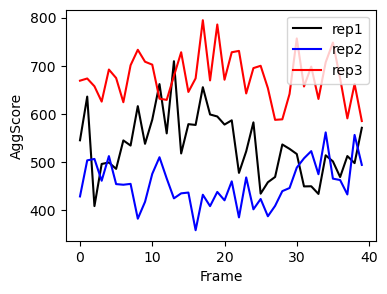

In [121]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
for i in range(N_rep):
    ax.plot(frame, rep_f[i], color = colors[i],  label=lab[i])
ax.legend(loc="best")
ax.set_xlabel("Frame")
ax.set_ylabel('AggScore')

In [135]:
len(rep_f)

5

In [ ]:
agg_sum

Text(0, 0.5, 'Exp agg after 28 days (%)')

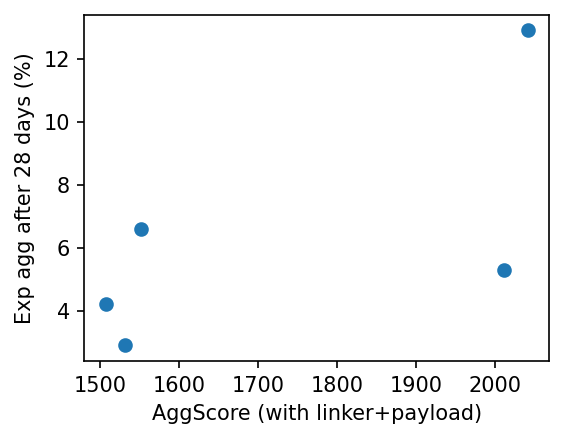

In [72]:
fig = plt.figure(figsize=(4,3))
#ag = [2240.1,2080.4,2165.8,2195.3,2227.5]
ag = [1551.3,1530.8,1506.8,2010.8,2041.6]

exp = [6.6,2.9,4.2,5.3,12.9]
ax = fig.add_subplot(111)
ax.scatter(ag,exp,  label="rep1")
ax.set_xlabel("AggScore (with linker+payload)")
ax.set_ylabel(r"Exp agg after 28 days (%)")


Pearsons correlation: 0.685
Spearmans correlation: 0.700


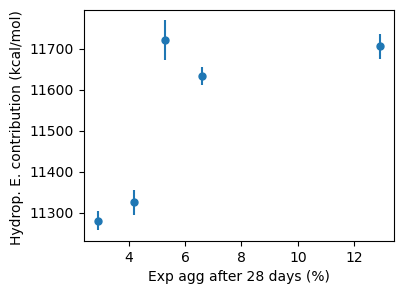

In [35]:
fig = plt.figure(figsize=(4,3))
#ag = [2240.1,2080.4,2165.8,2195.3,2227.5]

ag_error = [22,23,30,48,31] # all
ag = [11632,11280,11325,11721,11705] # all

#ag_error = [34,32,35,41,47] # > 100
#ag = [9537,9095,9370,9630,9626] # > 100

#ag_error = [57,77,73,81,93] # > 250
#ag = [6684,6761,7113,7348,7038] # > 250

#ag_error = [57,77,73,81,93] # > 500
#ag = [4526,4506,5166,5070,4709] # > 500

#ag_error = [29,33,39,35,35] # > 500
#ag = [332,172,306,415,362] # > 500
#ag = [6425,6274,6296,6620,6711] # > 500



exp = [6.6,2.9,4.2,5.3,12.9]
ax = fig.add_subplot(111)
ax.errorbar(exp,ag,  label="rep1",yerr=ag_error, xerr=0.0,linestyle='none', marker='o', markersize=5)
#ax.errorbar(ag, exp, xerr=0.2, yerr=0.4)
#ax.set_ylabel(r"Hydrophobic patch area ($\AA^2$) ")
#ax.set_ylabel(r"Hydrophobic patch area ($\AA^2$) / <Number of hydrophobic patches> ")
ax.set_ylabel(r"Hydrop. E. contribution (kcal/mol) ")
ax.set_xlabel(r"Exp agg after 28 days (%)")

corr, _ = pearsonr(exp,ag)
corr2, _ = spearmanr(exp,ag)
print('Pearsons correlation: %.3f' % corr)
print('Spearmans correlation: %.3f' % corr2)

(4.0, 7.0)

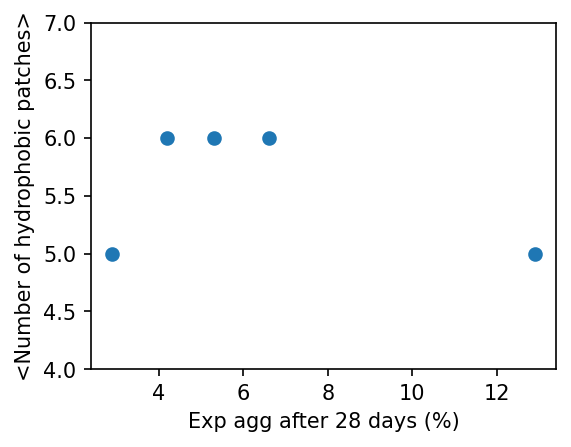

In [745]:
fig = plt.figure(figsize=(4,3))


ag = [6,5,6,6,5]

exp = [6.6,2.9,4.2,5.3,12.9]
ax = fig.add_subplot(111)
ax.scatter(exp,ag,  label="rep1", marker='o')
#ax.errorbar(ag, exp, xerr=0.2, yerr=0.4)
ax.set_ylabel(r"<Number of hydrophobic patches>")
ax.set_xlabel(r"Exp agg after 28 days (%)")
ax.set_ylim(4,7)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

In [193]:
points = 1500
data = np.zeros([points,3])
x = np.random.rand(points)*100
y = np.random.rand(points)*100
z = np.sinc((x-100)/200*3.14) + np.sinc((y-40)/50*3.14)

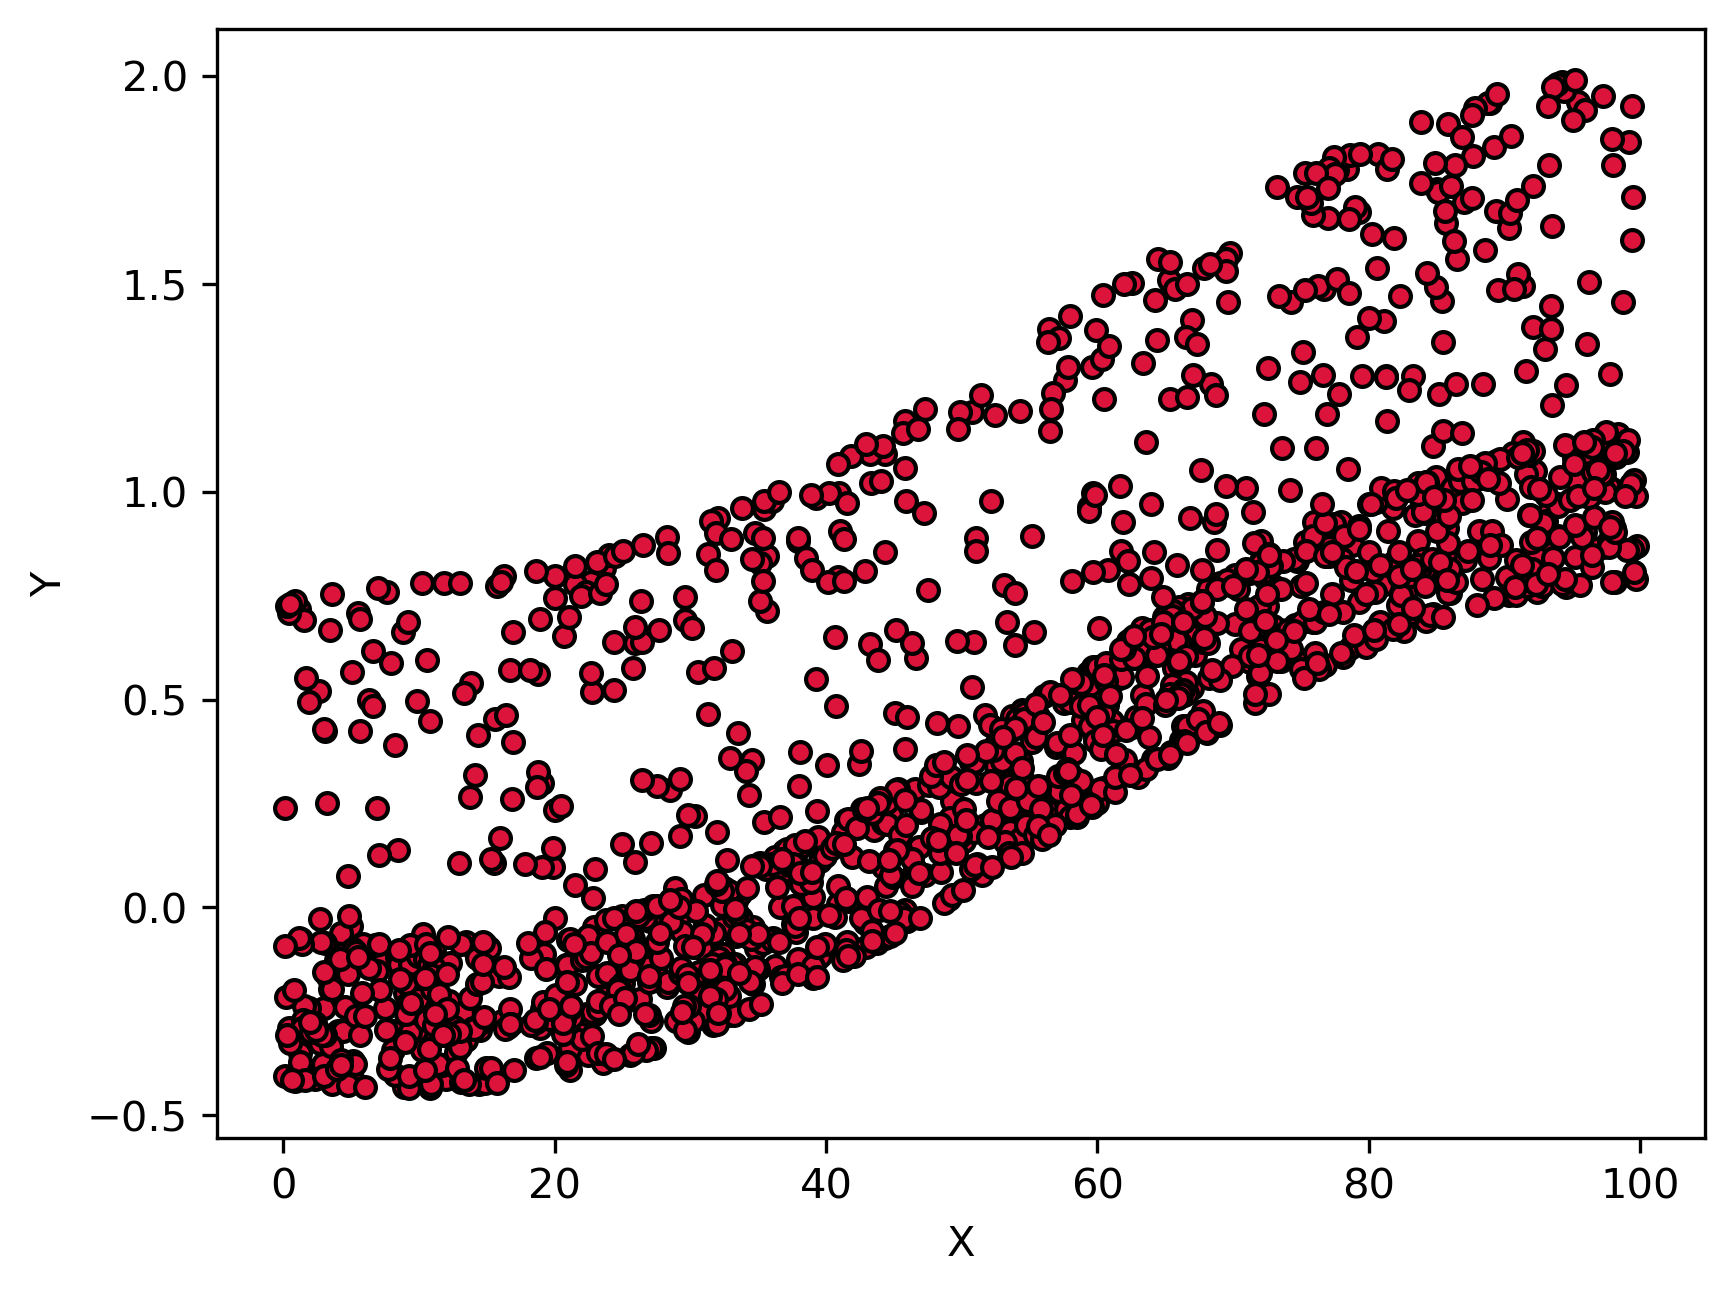

In [194]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x, z, marker=".", c="#DC143C", edgecolors="black", s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

In [195]:
triang = mtri.Triangulation(x, y)

In [196]:
isBad = np.where((x<1) | (x>99) | (y<1) | (y>99), True, False)

mask = np.any(isBad[triang.triangles],axis=1)
triang.set_mask(mask)

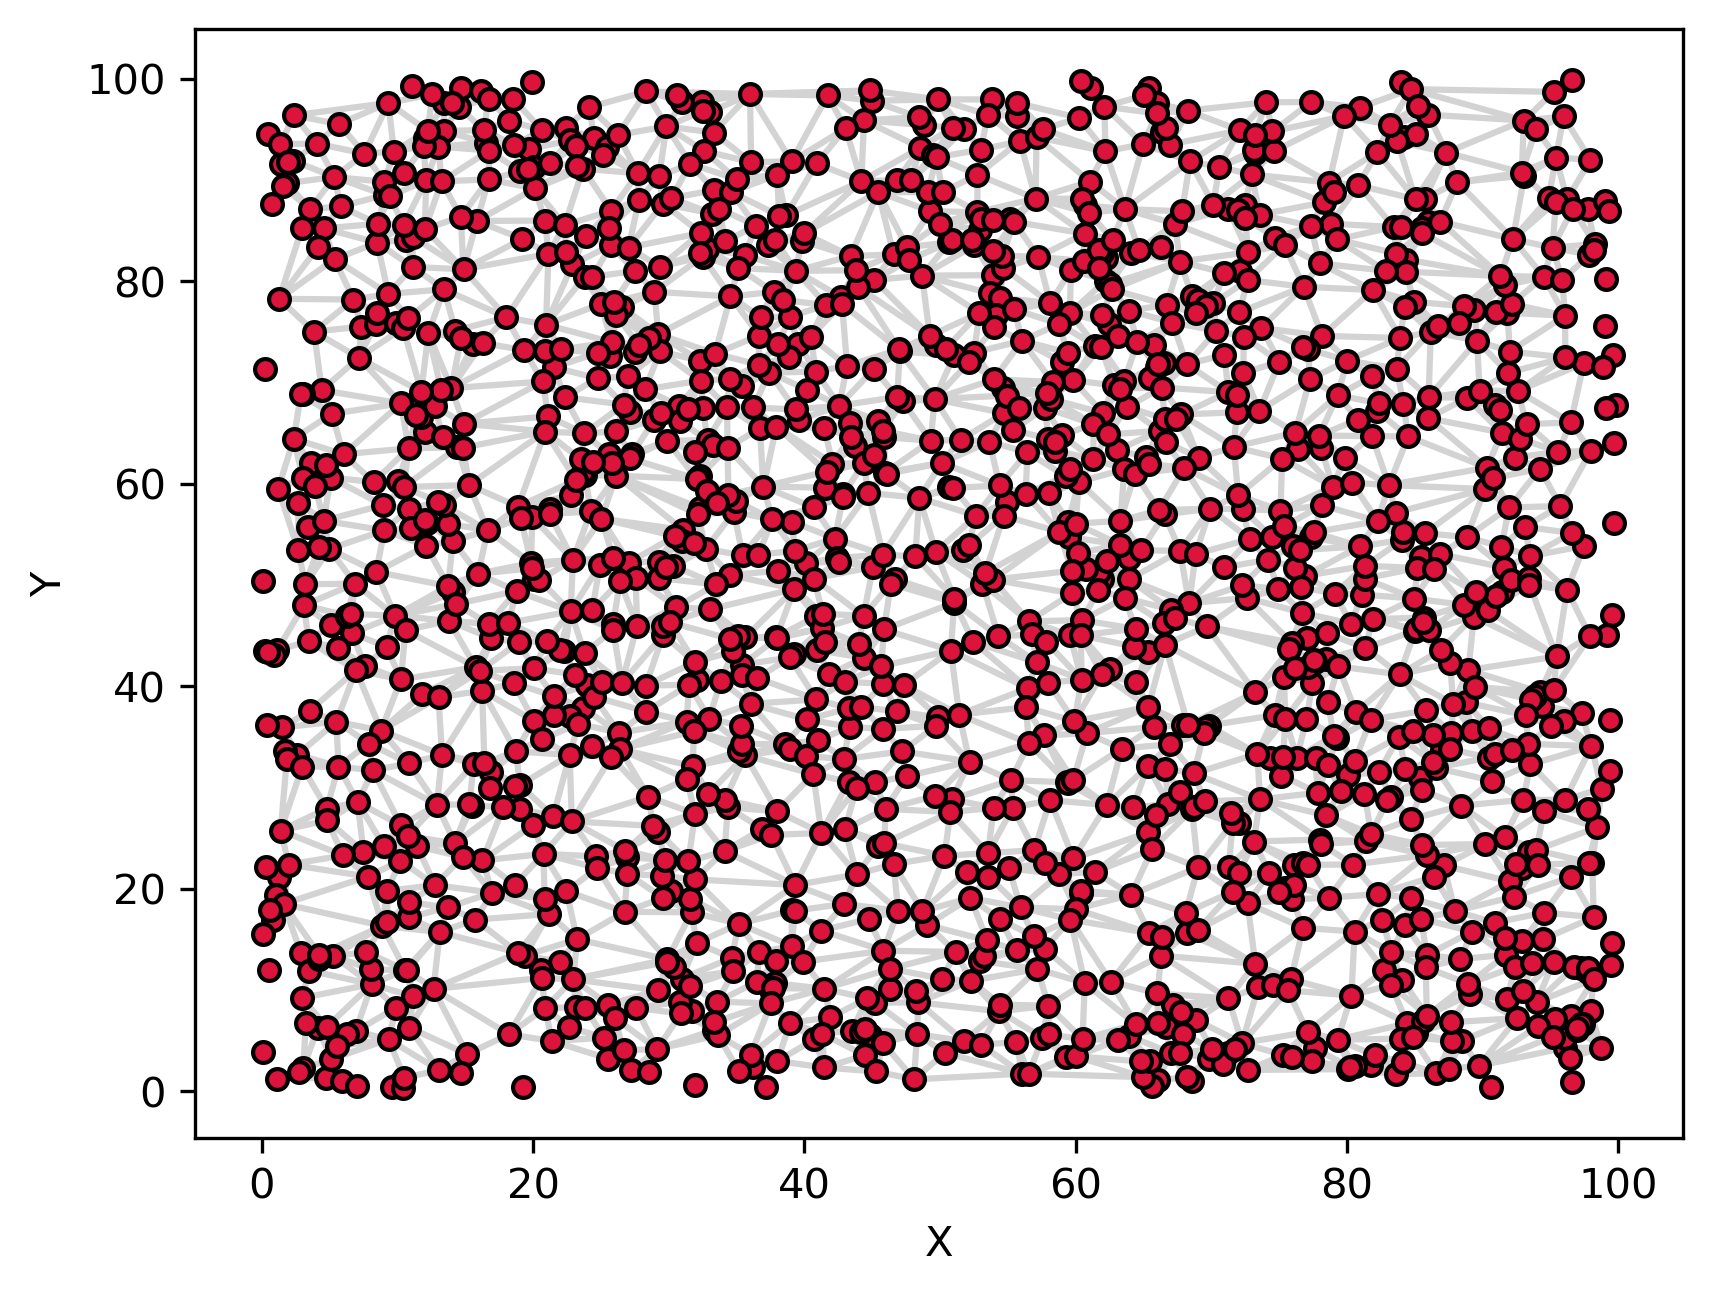

In [197]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="#DC143C", 
    markeredgecolor="black", markersize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [198]:
plt.rcParams["figure.dpi"] = (300)

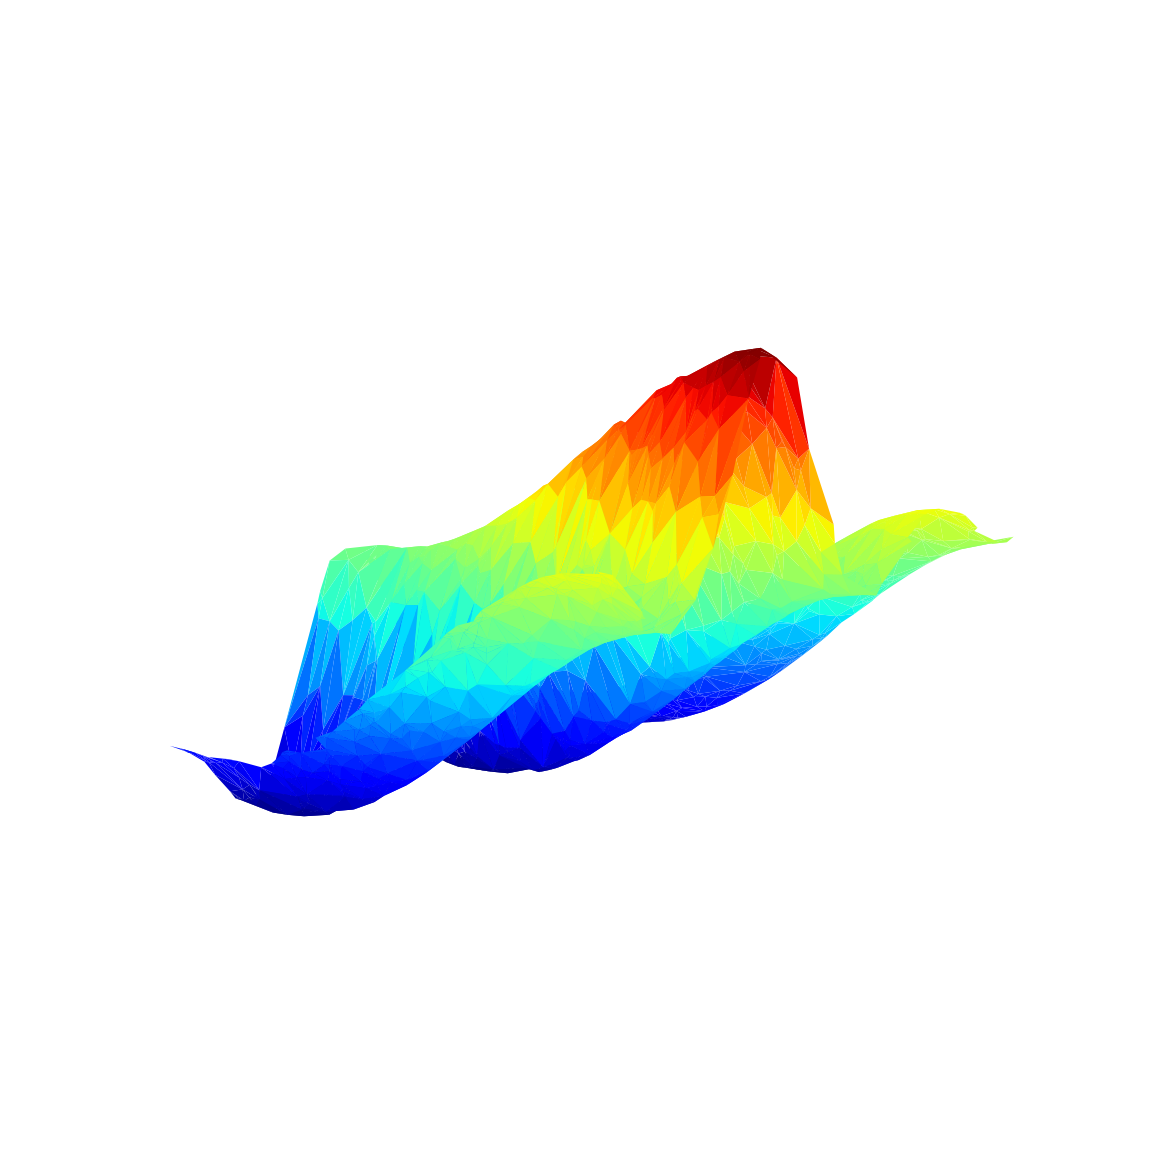

In [199]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, z, cmap='jet')
#ax.scatter(x,y,z, marker='.', s=10, c="black", alpha=0.5)
ax.view_init(elev=10, azim=-45)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Hide axes
ax.set_axis_off()
plt.show()

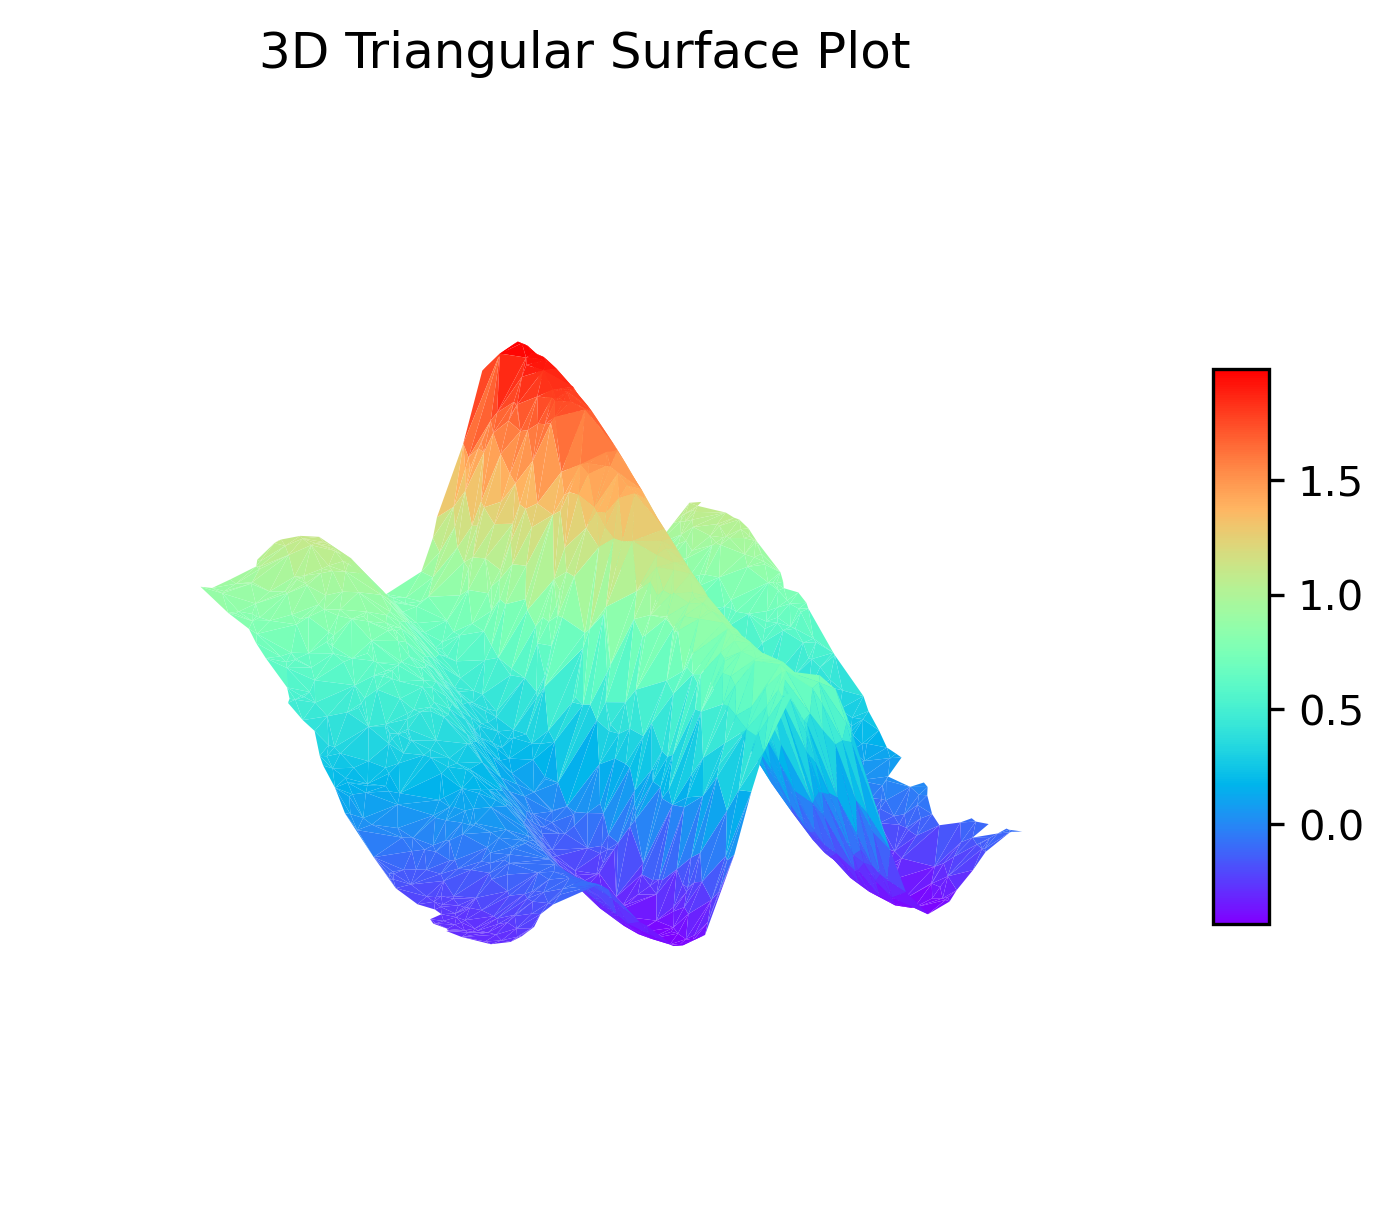

In [206]:
# Create a 3D triangular mesh plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(triang, z, cmap='rainbow')
ax.view_init(elev=10, azim=-210)
# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Triangular Surface Plot')
# Hide axes
ax.set_axis_off()
plt.show()

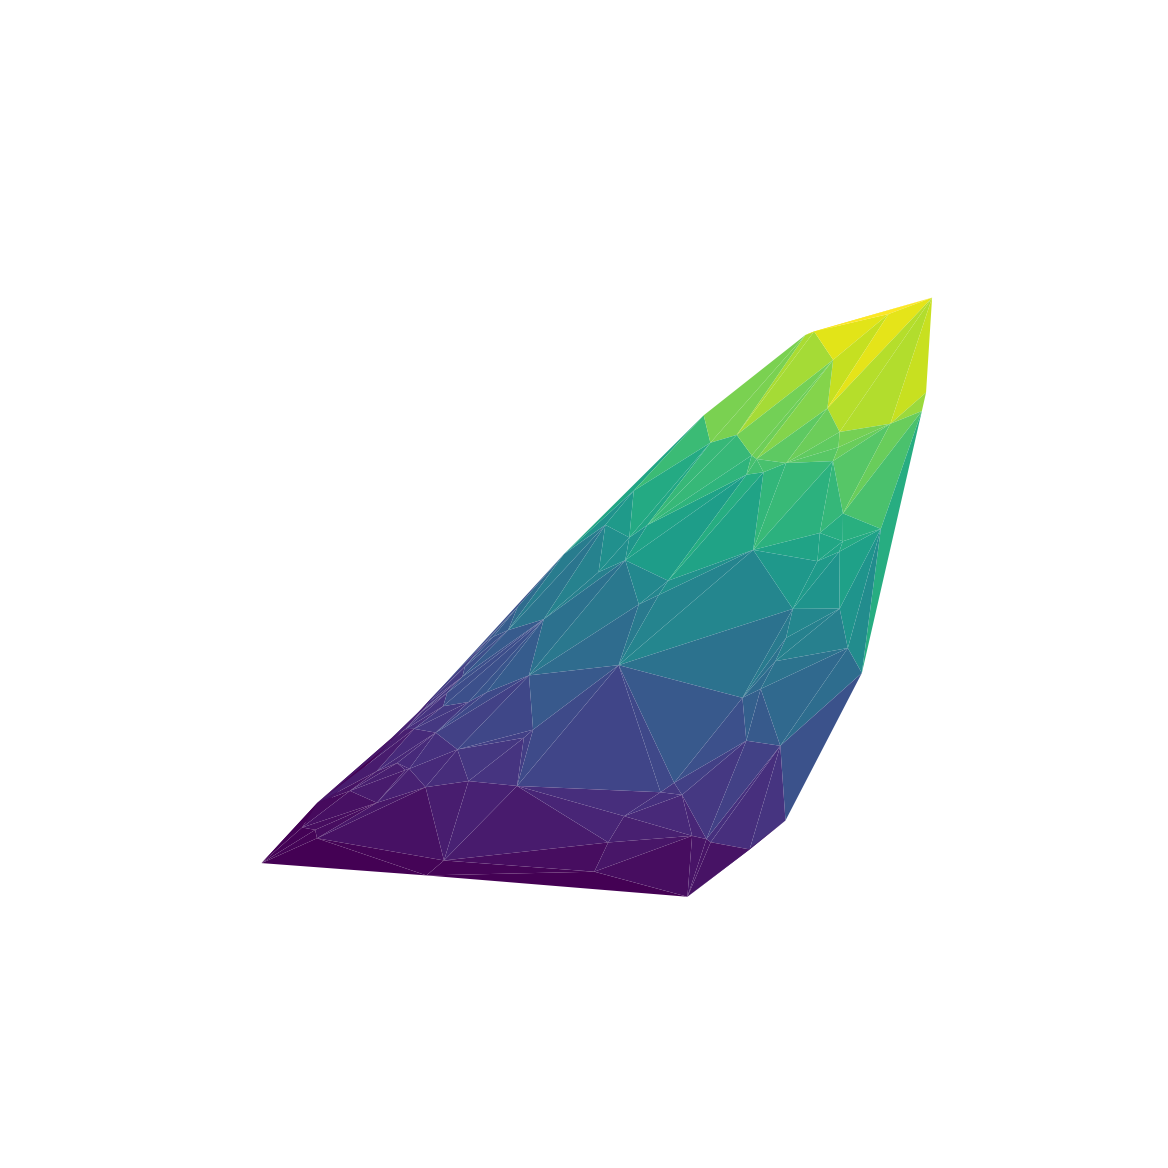

In [106]:
# Generate some sample data for the surface plot
x = np.random.random(100)
y = np.random.random(100)
z = np.sin(x * y)  # You would replace this with your own data or function

# Create a 3D triangular mesh plot without axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.view_init(elev=10, azim=-75)
# Hide axes
ax.set_axis_off()

plt.show()